# Explore SMT2020 datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

## High Volume Low Mix (HVLM)

### tool.txt

Info on tools with one tool fam (group of identical tools) per row.

In [2]:
tool = pd.read_csv("datasets/SMT2020_HVLM/tool.txt.1l", sep="\t")

In [3]:
tool.head()

,STNFAM,STN,RULE,FWLRANK,WAKERESRANK,BATCHCRITF,BATCHPER,LTIME,LTUNITS,ULTIME,ULTUNITS,STNCAP,STNQTY,STNGRP,STNFAMSTEP_ACTLIST,STNFAMLOC,PRERULERWL,SETUPGRP
0,DE_BE_11,DE_BE_11,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,10.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
1,DE_BE_12,DE_BE_12,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,9.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
2,DE_BE_13,DE_BE_13,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,wake_LeastSetupTime,NaN,NaN,1.0,min,1.0,min,NaN,21.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
3,DE_BE_48,DE_BE_48,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,10.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN
4,DE_BE_50,DE_BE_50,rule_HotLotFIRST,rank_HP;rank_RSETUP;rank_FIFO,NaN,NaN,NaN,1.0,min,1.0,min,NaN,9.0,Dry_Etch,Custom_actlist_ASISemiOpersDuringSetupAndAddit...,Fab,no,NaN


Looks like a flattened version of `tool.txt` described in dataset documentation (repeated rows that only differ in FWLRANK are combined, for example, and multiple FWLRANK values are listed in one cell separated by ";").

In [12]:
tool.shape

(106, 18)

In [13]:
tool.columns

Index(['STNFAM', 'STN', 'RULE', 'FWLRANK', 'WAKERESRANK', 'BATCHCRITF',
       'BATCHPER', 'LTIME', 'LTUNITS', 'ULTIME', 'ULTUNITS', 'STNCAP',
       'STNQTY', 'STNGRP', 'STNFAMSTEP_ACTLIST', 'STNFAMLOC', 'PRERULERWL',
       'SETUPGRP'],
      dtype='object')

In [8]:
# how many distinct STNFAM?
tool["STNFAM"].nunique()

106

Text(0, 0.5, 'Freq')

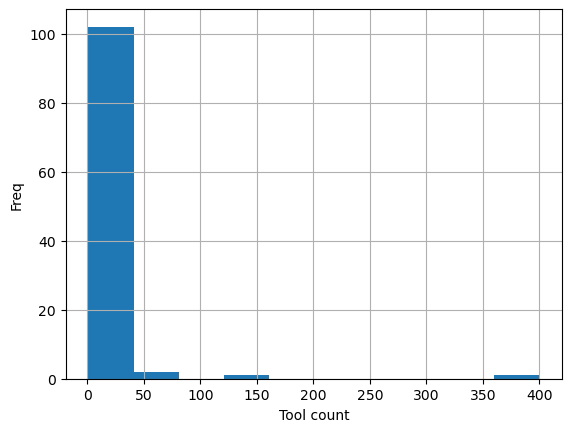

In [31]:
# distribution of STNQTY (num tools in tool fam)
ax = tool["STNQTY"].hist()
ax.set_xlabel("Tool count")
ax.set_ylabel("Freq")

In [ ]:
# what are the tool fams with very high tool counts?
tool.set_index("STNFAM")["STNQTY"].sort_values(ascending=False)

STNFAM
Delay_32             400.0
DE_FE_86             135.0
LithoTrack_FE_115     51.0
LithoTrack_FE_95      49.0
WE_FE_108             35.0
                     ...  
TF_Met_FE_45           2.0
DefMet_BE_42           1.0
DefMet_FE_106          1.0
EPI_38                 1.0
WE_BE_7                1.0
Name: STNQTY, Length: 106, dtype: float64

In [20]:
tool.set_index("STNFAM").loc["Delay_32"]

STN                                                              Delay1
RULE                                                   rule_HotLotFIRST
FWLRANK                                   rank_HP;rank_RSETUP;rank_FIFO
WAKERESRANK                                                         NaN
BATCHCRITF                                                          NaN
BATCHPER                                                            NaN
LTIME                                                               0.0
LTUNITS                                                             min
ULTIME                                                              0.0
ULTUNITS                                                            min
STNCAP                                                              NaN
STNQTY                                                            400.0
STNGRP                                                         Delay_32
STNFAMSTEP_ACTLIST    Custom_actlist_ASISemiOpersDuringSetupAndA

In [21]:
tool.set_index("STNFAM").loc["DE_FE_86"]

STN                                                            DE_FE_86
RULE                                                   rule_HotLotFIRST
FWLRANK                                   rank_HP;rank_RSETUP;rank_FIFO
WAKERESRANK                                                         NaN
BATCHCRITF                                                          NaN
BATCHPER                                                            NaN
LTIME                                                               1.0
LTUNITS                                                             min
ULTIME                                                              1.0
ULTUNITS                                                            min
STNCAP                                                              NaN
STNQTY                                                            135.0
STNGRP                                                         Dry_Etch
STNFAMSTEP_ACTLIST    Custom_actlist_ASISemiOpersDuringSetupAndA

**Q**: Delay steps are mentioned in documentation - what are these?

**Q**: Does tool count make sense for Dry Etch step?

Text(0, 0.5, 'Freq')

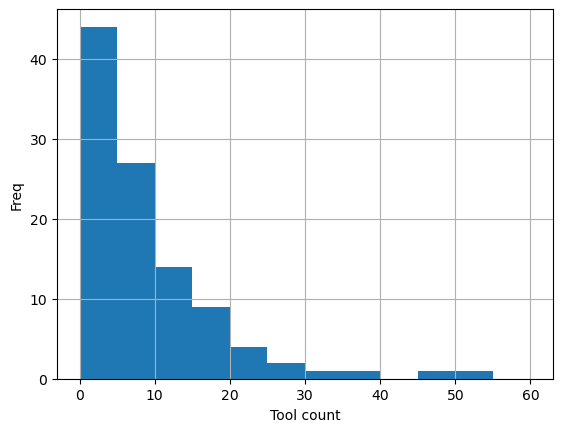

In [33]:
# replot excluding Delay and Dry Etch tool fams with high tool counts
ax = tool["STNQTY"].hist(range=(0, 60), bins=12)
ax.set_xlabel("Tool count")
ax.set_ylabel("Freq")

In [36]:
# tool fam count by tool group (mfg area)
tool.groupby("STNGRP")["STNGRP"].count()

STNGRP
Def_Met        7
Delay_32       1
Dielectric    10
Diffusion     10
Dry_Etch      21
Implant        9
Litho         11
Litho_Met      4
Planar         6
TF            11
TF_Met         2
Wet_Etch      14
Name: STNGRP, dtype: int64

In [37]:
# tool count by tool group
tool.groupby("STNGRP")["STNQTY"].sum()

STNGRP
Def_Met        16.0
Delay_32      400.0
Dielectric     59.0
Diffusion      75.0
Dry_Etch      362.0
Implant        35.0
Litho         203.0
Litho_Met      53.0
Planar         34.0
TF             90.0
TF_Met          4.0
Wet_Etch      112.0
Name: STNQTY, dtype: float64

Tool fam & tool counts match documentation (IEEE paper), but Delay_32 was not mentioned in paper.

**Q**: What is Delay_32 tool group?

### part.txt

Info on products and associated routes, with one product per row.

In [8]:
part = pd.read_csv("datasets/SMT2020_HVLM/part.txt", sep="\t")

In [9]:
part.shape

(2, 5)

In [10]:
part

,PARTGRP,PARTFAM,PART,ROUTEFILE,ROUTE
0,Saleable,product_3,part_3,route_3.txt,r_3
1,Saleable,product_4,part_4,route_4.txt,r_4


### route_i.txt

Info on each process step for a specific route, with one step per row, listed in order of processing sequence.

In [41]:
route_3 = pd.read_csv("datasets/SMT2020_HVLM/route_3.txt", sep="\t")

In [42]:
route_3.shape

(583, 29)

In [43]:
route_3.head()

,ROUTE,STEP,DESC,STNFAM,PDIST,PTIME,PTIME2,PTUNITS,PTPER,BATCHMN,...,PartInterval,PartIntUnits,RWKSTEP,REWORK,RWKTYPE,StepPercent,STEP_CQT,CQT,CQTUNITS,IGNORE
0,r_3,1,001_Diffusion,Diffusion_FE_120,uniform,501.330,25.0665,min,per_batch,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diffusion
1,r_3,2,002_Wet_Etch,WE_FE_84,uniform,0.852,0.0426,min,per_piece,NaN,...,0.639,min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wet_Etch
2,r_3,3,003_Def_Met,DefMEt_FE_118,uniform,17.994,0.8997,min,per_lot,NaN,...,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,Def_Met
3,r_3,4,007_TF_Met,TF_Met_FE_45,uniform,8.514,0.4257,min,per_lot,NaN,...,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,TF_Met
4,r_3,5,008_Diffusion,Diffusion_FE_127,uniform,437.580,21.8790,min,per_batch,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diffusion


In [46]:
route_3.loc[0]

ROUTE                         r_3
STEP                            1
DESC                001_Diffusion
STNFAM           Diffusion_FE_120
PDIST                     uniform
PTIME                      501.33
PTIME2                    25.0665
PTUNITS                       min
PTPER                   per_batch
BATCHMN                     125.0
BATCHMX                     150.0
SETUP                         NaN
WHEN                          NaN
STIME                         NaN
STUNITS                       NaN
SVESTN                        NaN
FORSTEP                       NaN
BatchInterval                 NaN
BatchIntUnits                 NaN
PartInterval                  NaN
PartIntUnits                  NaN
RWKSTEP                       NaN
REWORK                        NaN
RWKTYPE                       NaN
StepPercent                   NaN
STEP_CQT                      NaN
CQT                           NaN
CQTUNITS                      NaN
IGNORE                  Diffusion
Name: 0, dtype

In [47]:
route_4 = pd.read_csv("datasets/SMT2020_HVLM/route_4.txt", sep="\t")

In [48]:
route_4.shape

(343, 29)

### order.txt

Info on lots to be released into simulation model, with one order (combination of product and priority?) per row.

In [3]:
order = pd.read_csv("datasets/SMT2020_HVLM/order.txt", sep="\t")

In [4]:
order.shape

(5, 13)

In [6]:
order

,LOT,PART,PRIOR,PIECES,START,RDIST,REPEAT,RUNITS,RPT#,LOTSPERRPT,DUE,ORDER,HOTLOT
0,Lot_3,part_3,10,25,01/01/18 00:00:00,constant,51.69,min,200000,1,02/23/18 20:07:47,O_Lot_3,no
1,Lot_4,part_4,10,25,01/01/18 00:00:00,constant,51.69,min,200000,1,01/31/18 07:29:20,O_Lot_4,no
2,HotLot_3,part_3,20,25,01/01/18 00:00:00,constant,2016.00,min,20000,1,02/03/18 07:59:15,O_HotLot_3,no
3,HotLot_4,part_4,20,25,01/01/18 00:00:00,constant,2016.00,min,20000,1,01/20/18 13:17:36,O_HotLot_4,no
4,SuperHotLot_3,part_3,30,25,01/01/18 00:00:00,constant,27397.61,min,2000,1,02/03/18 05:13:01,O_SuperHotLot_3,no


**Q**: Is this table used to configure lot release cadence? So each order/row represents a different cadence?